In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('MLF_GP2_EconCycle.csv')
df.head()

,Date,T1Y Index,T2Y Index,T3Y Index,T5Y Index,T7Y Index,T10Y Index,CP1M,CP3M,CP6M,CP1M_T1Y,CP3M_T1Y,CP6M_T1Y,USPHCI,PCT 3MO FWD,PCT 6MO FWD,PCT 9MO FWD
0,1/31/1979,10.41,9.86,9.50,9.20,9.14,9.10,9.75,9.95,10.01,0.936599,0.955812,0.961575,47.08,0.011470,0.018060,0.024406
1,2/28/1979,10.24,9.72,9.29,9.13,9.11,9.10,9.74,9.90,9.96,0.951172,0.966797,0.972656,47.32,0.009298,0.014866,0.020612
2,3/31/1979,10.25,9.79,9.38,9.20,9.15,9.12,9.72,9.85,9.87,0.948293,0.960976,0.962927,47.39,0.010340,0.015455,0.020154
3,4/30/1979,10.12,9.78,9.43,9.25,9.21,9.18,9.86,9.95,9.98,0.974308,0.983202,0.986166,47.62,0.006720,0.013141,0.017409
4,5/31/1979,10.12,9.78,9.42,9.24,9.23,9.25,9.77,9.76,9.71,0.965415,0.964427,0.959486,47.76,0.005653,0.011451,0.016353


In [3]:
#df2=df2.dropna()
df = df.iloc[:,1:]#drop the date column 
df['CP1M_T2Y']= df['CP1M']/df['T2Y Index']#add more column about commercial paper and other Treasury bill spread 
df['CP3M_T2Y']= df['CP3M']/df['T2Y Index']
df['CP6M_T2Y']= df['CP6M']/df['T2Y Index']

df['CP1M_T3Y']= df['CP1M']/df['T3Y Index']
df['CP3M_T3Y']= df['CP3M']/df['T3Y Index']
df['CP6M_T3Y']= df['CP6M']/df['T3Y Index']

df['CP1M_T5Y']= df['CP1M']/df['T5Y Index']
df['CP3M_T5Y']= df['CP3M']/df['T5Y Index']
df['CP6M_T5Y']= df['CP6M']/df['T5Y Index']

df['CP1M_T7Y']= df['CP1M']/df['T7Y Index']
df['CP3M_T7Y']= df['CP3M']/df['T7Y Index']
df['CP6M_T7Y']= df['CP6M']/df['T7Y Index']

df['CP1M_T10Y']= df['CP1M']/df['T10Y Index']
df['CP3M_T10Y']= df['CP3M']/df['T10Y Index']
df['CP6M_T10Y']= df['CP6M']/df['T10Y Index']



In [4]:
df.head()

,T1Y Index,T2Y Index,T3Y Index,T5Y Index,T7Y Index,T10Y Index,CP1M,CP3M,CP6M,CP1M_T1Y,...,CP6M_T3Y,CP1M_T5Y,CP3M_T5Y,CP6M_T5Y,CP1M_T7Y,CP3M_T7Y,CP6M_T7Y,CP1M_T10Y,CP3M_T10Y,CP6M_T10Y
0,10.41,9.86,9.50,9.20,9.14,9.10,9.75,9.95,10.01,0.936599,...,1.053684,1.059783,1.081522,1.088043,1.066740,1.088621,1.095186,1.071429,1.093407,1.100000
1,10.24,9.72,9.29,9.13,9.11,9.10,9.74,9.90,9.96,0.951172,...,1.072121,1.066813,1.084337,1.090909,1.069155,1.086718,1.093304,1.070330,1.087912,1.094505
2,10.25,9.79,9.38,9.20,9.15,9.12,9.72,9.85,9.87,0.948293,...,1.052239,1.056522,1.070652,1.072826,1.062295,1.076503,1.078689,1.065789,1.080044,1.082237
3,10.12,9.78,9.43,9.25,9.21,9.18,9.86,9.95,9.98,0.974308,...,1.058324,1.065946,1.075676,1.078919,1.070575,1.080347,1.083605,1.074074,1.083878,1.087146
4,10.12,9.78,9.42,9.24,9.23,9.25,9.77,9.76,9.71,0.965415,...,1.030786,1.057359,1.056277,1.050866,1.058505,1.057421,1.052004,1.056216,1.055135,1.049730


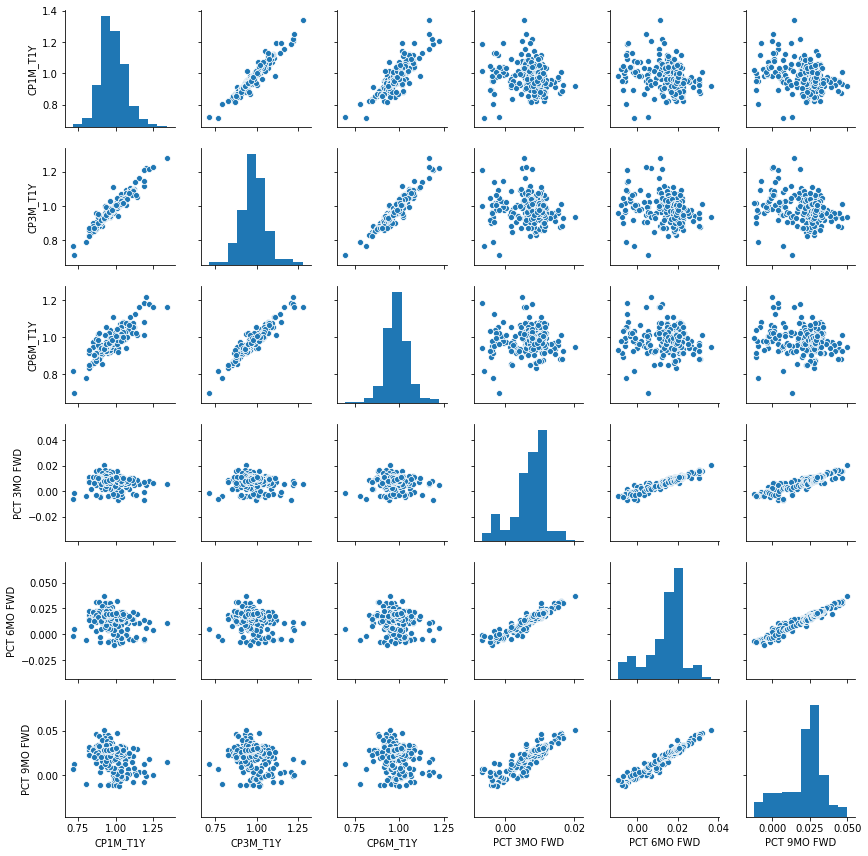

In [21]:
#cols=['T1Y Index','CP3M','CP3M_T1Y','PCT 3MO FWD']
#columns' name for features
Xcols=['T1Y Index','T2Y Index','T3Y Index','T5Y Index','T7Y Index','T10Y Index','CP1M','CP3M','CP6M','CP1M_T1Y','CP3M_T1Y','CP6M_T1Y',
       'CP1M_T2Y','CP3M_T2Y','CP6M_T2Y',
      'CP1M_T3Y','CP3M_T3Y','CP6M_T3Y',
      'CP1M_T5Y','CP3M_T5Y','CP6M_T5Y',
      'CP1M_T7Y','CP3M_T7Y','CP6M_T7Y',
      'CP1M_T10Y','CP3M_T10Y','CP6M_T10Y']
ycols = ['PCT 3MO FWD','PCT 6MO FWD','PCT 9MO FWD']
#HeatMap
cols=['CP1M_T1Y','CP3M_T1Y','CP6M_T1Y',
      #'CP1M_T2Y',
      #'CP1M_T3Y',
      #'CP1M_T5Y',
      #'CP1M_T7Y',
      #'CP1M_T10Y',
      'PCT 3MO FWD','PCT 6MO FWD','PCT 9MO FWD']
#Scatterplot Matrix
sns.pairplot(df[cols], height=2)
plt.show()

(6.0, 0.0)

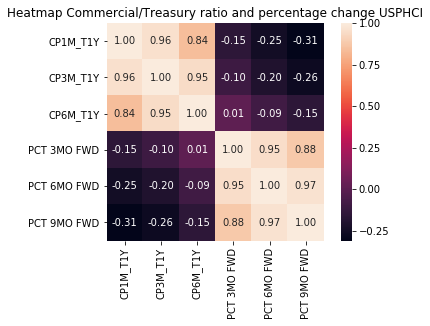

In [17]:
import seaborn as sns
cm = np.corrcoef(df[cols].values.T)
ax = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols, xticklabels=cols) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
plt.title("Heatmap Commercial/Treasury ratio and percentage change USPHCI")
ax.set_ylim(bottom + 0.5, top - 0.5)

In [88]:
#Preprocessing, Feature extraction and Feature selection
X=df[Xcols]
y=df[ycols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=42)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#X_train_std = StandardScaler().fit_transform(X_train)
#X_test_std= StandardScaler().fit_transform(X_test)

X_train_std=StandardScaler().fit_transform(X_train)
X_test_std=StandardScaler().fit_transform(X_test)

y_train_std=StandardScaler().fit_transform(y_train)
#y_train_std=y_train
y_test_std = StandardScaler().fit_transform(y_test)
#y_test_std = y_test

In [89]:
#Using ridge regression to modeling
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#k_range = np.arange(0.0, 1.0, 0.1)
k_range = (0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0)
for k in k_range:
    ridge = Ridge(alpha=k)
    ridge.fit(X_train, y_train)
    y_train_pred = ridge.predict(X_train_std)
    y_test_pred = ridge.predict(X_test_std)
    print('alpha=',k,'MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train_std, y_train_pred),
        mean_squared_error(y_test_std, y_test_pred)))
    print('alpha=',k ,'R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train_std, y_train_pred),
        r2_score(y_test_std, y_test_pred)))

alpha= 0.0 MSE train: 0.881, test: 1.211
alpha= 0.0 R^2 train: 0.119, test: -0.211
alpha= 0.1 MSE train: 1.024, test: 1.039
alpha= 0.1 R^2 train: -0.024, test: -0.039
alpha= 0.2 MSE train: 1.022, test: 1.035
alpha= 0.2 R^2 train: -0.022, test: -0.035
alpha= 0.3 MSE train: 1.021, test: 1.034
alpha= 0.3 R^2 train: -0.021, test: -0.034
alpha= 0.4 MSE train: 1.021, test: 1.032
alpha= 0.4 R^2 train: -0.021, test: -0.032
alpha= 0.5 MSE train: 1.020, test: 1.031
alpha= 0.5 R^2 train: -0.020, test: -0.031
alpha= 0.6 MSE train: 1.020, test: 1.030
alpha= 0.6 R^2 train: -0.020, test: -0.030
alpha= 0.7 MSE train: 1.019, test: 1.029
alpha= 0.7 R^2 train: -0.019, test: -0.029
alpha= 0.8 MSE train: 1.019, test: 1.029
alpha= 0.8 R^2 train: -0.019, test: -0.029
alpha= 0.9 MSE train: 1.018, test: 1.028
alpha= 0.9 R^2 train: -0.018, test: -0.028
alpha= 1.0 MSE train: 1.018, test: 1.027
alpha= 1.0 R^2 train: -0.018, test: -0.027


In [90]:
#coef_
ridge = Ridge(alpha=1)
ridge.fit(X_train_std, y_train_std)
y_train_pred = ridge.predict(X_train_std)
y_test_pred = ridge.predict(X_test_std)
#print(ridge.coef_)
#ridge.coef_
df_4 = pd.DataFrame(ridge.coef_)
df_2 = pd.DataFrame(Xcols)
coefficient3= pd.concat([df_2, df_4.iloc[0],df_4.iloc[1],df_4.iloc[2]],axis=1, ignore_index=True)
coefficient3

,0,1,2,3
0,T1Y Index,-1.178442,-1.132329,-1.127766
1,T2Y Index,-0.622536,-0.498221,-0.295559
2,T3Y Index,-0.119797,-0.158548,-0.141674
3,T5Y Index,0.182045,0.168797,0.098812
4,T7Y Index,0.647196,0.619218,0.549240
5,T10Y Index,1.051749,0.996792,0.901199
6,CP1M,0.079951,-0.032518,-0.145674
7,CP3M,-0.284610,-0.266632,-0.204570
8,CP6M,-0.599547,-0.544536,-0.410972
9,CP1M_T1Y,-0.507662,-0.472351,-0.380115


In [91]:
#LASSO regression
from sklearn.linear_model import Lasso
#k_range = np.arange(0.0, 1.0, 0.1)
k_range = (0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0)
for k in k_range:
    lasso = Lasso(alpha=k)
    lasso.fit(X_train_std, y_train_std)
    y_train_pred = lasso.predict(X_train_std)
    y_test_pred = lasso.predict(X_test_std)
    print('alpha=',k,'MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train_std, y_train_pred),
        mean_squared_error(y_test_std, y_test_pred)))
    print('alpha=',k ,'R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train_std, y_train_pred),
        r2_score(y_test_std, y_test_pred)))

#here we get while alpha=0.0, we have a small MSE and large R^2

alpha= 0.0 MSE train: 0.631, test: 0.650
alpha= 0.0 R^2 train: 0.369, test: 0.350
alpha= 0.1 MSE train: 0.823, test: 0.756
alpha= 0.1 R^2 train: 0.177, test: 0.244
alpha= 0.2 MSE train: 0.854, test: 0.808
alpha= 0.2 R^2 train: 0.146, test: 0.192
alpha= 0.3 MSE train: 0.905, test: 0.878
alpha= 0.3 R^2 train: 0.095, test: 0.122
alpha= 0.4 MSE train: 0.969, test: 0.960
alpha= 0.4 R^2 train: 0.031, test: 0.040
alpha= 0.5 MSE train: 1.000, test: 1.000
alpha= 0.5 R^2 train: -0.000, test: 0.000
alpha= 0.6 MSE train: 1.000, test: 1.000
alpha= 0.6 R^2 train: -0.000, test: 0.000
alpha= 0.7 MSE train: 1.000, test: 1.000
alpha= 0.7 R^2 train: -0.000, test: 0.000
alpha= 0.8 MSE train: 1.000, test: 1.000
alpha= 0.8 R^2 train: -0.000, test: 0.000
alpha= 0.9 MSE train: 1.000, test: 1.000
alpha= 0.9 R^2 train: -0.000, test: 0.000
alpha= 1.0 MSE train: 1.000, test: 1.000
alpha= 1.0 R^2 train: -0.000, test: 0.000


/Users/changxuezhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/Users/changxuezhi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/changxuezhi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.08566155530214, tolerance: 0.013300000000000001
  positive)
/Users/changxuezhi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.98984020316269, tolerance: 0.013300000000000001
  positive

In [92]:
lasso = Lasso(alpha=0.0)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
#print(lasso.coef_)
df_3 = pd.DataFrame(lasso.coef_)
df_2 = pd.DataFrame(Xcols)
coefficient3= pd.concat([df_2, df_3.iloc[0],df_3.iloc[1],df_3.iloc[2]],axis=1, ignore_index=True)
coefficient3
#here we can choose three components to predict our future 

/Users/changxuezhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/Users/changxuezhi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/changxuezhi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009330371312575372, tolerance: 2.8801678790047707e-07
  positive)
/Users/changxuezhi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0032361778825325534, tolerance: 1.0250376193249048e-06
  positi

,0,1,2,3
0,T1Y Index,-0.006535,-0.012524,-0.020432
1,T2Y Index,-0.000431,0.002238,0.011206
2,T3Y Index,0.000789,-0.000608,-0.002978
3,T5Y Index,0.000636,0.001643,-0.000295
4,T7Y Index,0.001504,0.002643,0.003227
5,T10Y Index,0.004109,0.006936,0.008602
6,CP1M,0.005610,0.007101,0.005906
7,CP3M,-0.003039,-0.003562,-0.001786
8,CP6M,-0.003428,-0.005389,-0.005426
9,CP1M_T1Y,-0.208627,-0.400937,-0.477820


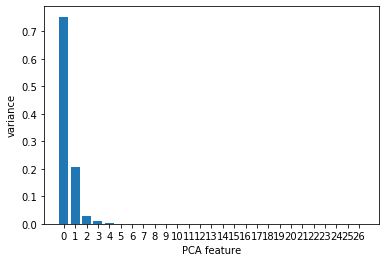

[0.75375772 0.95917308 0.98761052 0.99712438 0.9984989  0.99925584
 0.99955664 0.99971799 0.9998721  0.9999315  0.99996392 0.99998139
 0.99999219 0.99999748 0.99999842 0.99999931 0.99999952 0.9999997
 0.99999985 0.99999994 0.99999997 0.99999999 0.99999999 1.
 1.         1.         1.        ]


In [93]:
##using PCA to select features
#PCA
pca=PCA()
X_train_pca=pca.fit_transform(X_train_std)
#X_test_pca=pca.transform(X_test_std)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()
print(np.cumsum(pca.explained_variance_ratio_))

In [95]:
#We choose the PCA components as 4 so that we can have 99% of the variance
#PCA
pca=PCA(n_components = 4)
X_train_pca=pca.fit_transform(X_train_std)
X_test_pca=pca.transform(X_test_std)
#print(X_train_pca)
#print(X_test_pca)
#y1_train= y_train_std.iloc[:,0]
#y2_train=y_train_std.iloc[:,1]
#y3_train=y_train_std.iloc[:,2]
y1_train= y_train_std[:,0]
y2_train=y_train_std[:,1]
y3_train=y_train_std[:,2]
#y1_test=y_test_std.iloc[:,0]
#y2_test=y_test_std.iloc[:,1]
#y3_test=y_test_std.iloc[:,2]
y1_test=y_test_std[:,0]
y2_test=y_test_std[:,1]
y3_test=y_test_std[:,2]
print(np.cumsum(pca.explained_variance_ratio_))

[0.75375772 0.95917308 0.98761052 0.99712438]


In [76]:
#linear regression
from sklearn import linear_model
from sklearn.metrics import *
from math import *
#for y1 target

lr= linear_model.SGDRegressor(loss='squared_loss', penalty=None,random_state = 42)
lr.fit(X_train_pca, y1_train)

y1_pred_train=lr.predict(X_train_pca)
y1_pred_test=lr.predict(X_test_pca)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y1_train, y1_pred_train),
        mean_squared_error(y1_test, y1_pred_test)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y1_train, y1_pred_train),
        r2_score(y1_test, y1_pred_test)))
print('RMSE train: %.3f, test: %.3f' % (
        sqrt(mean_squared_error(y1_train, y1_pred_train)),
       sqrt(mean_squared_error(y1_test, y1_pred_test))))
print('Slope: ', lr.coef_)
print('Intercept: %.3f' % lr.intercept_)
#we don't get any linear correlation between the features and y1 targets
#which is evident from the heatmap also. 
#we do not try with normal linear, lasso and ridge regression because they are also linear regressors and the error 
#will remain the same as in the linear one

MSE train: 0.852, test: 0.781
R^2 train: 0.148, test: 0.219
RMSE train: 0.923, test: 0.884
Slope:  [-0.07260922 -0.07745334  0.03574195 -0.22345026]
Intercept: 0.006


In [77]:
#for y2 target
lr= linear_model.SGDRegressor(loss='squared_loss', penalty=None,random_state = 42)
lr.fit(X_train_pca, y2_train)
y2_pred_train=lr.predict(X_train_pca)
y2_pred_test=lr.predict(X_test_pca)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y2_train, y2_pred_train),
        mean_squared_error(y2_test, y2_pred_test)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y2_train, y2_pred_train),
        r2_score(y2_test, y2_pred_test)))
print('RMSE train: %.3f, test: %.3f' % (
        sqrt(mean_squared_error(y2_train, y2_pred_train)),
       sqrt(mean_squared_error(y2_test, y2_pred_test))))
print('Slope: ', lr.coef_)
print('Intercept: %.3f' % lr.intercept_)

MSE train: 0.835, test: 0.698
R^2 train: 0.165, test: 0.302
RMSE train: 0.914, test: 0.835
Slope:  [-0.1153651  -0.08004105  0.03451101 -0.13248921]
Intercept: 0.001


In [78]:
#for y3 target
lr= linear_model.SGDRegressor(loss='squared_loss', penalty=None,random_state = 42)
lr.fit(X_train_pca, y3_train)
y3_pred_train=lr.predict(X_train_pca)
y3_pred_test=lr.predict(X_test_pca)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y3_train, y3_pred_train),
        mean_squared_error(y3_test, y3_pred_test)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y3_train, y3_pred_train),
        r2_score(y3_test, y3_pred_test)))
print('RMSE train: %.3f, test: %.3f' % (
        sqrt(mean_squared_error(y3_train, y3_pred_train)),
       sqrt(mean_squared_error(y3_test, y3_pred_test))))
print('Slope: ', lr.coef_)
print('Intercept: %.3f' % lr.intercept_)

MSE train: 0.777, test: 0.646
R^2 train: 0.223, test: 0.354
RMSE train: 0.882, test: 0.804
Slope:  [-0.09612086 -0.0626321   0.04107318 -0.12034385]
Intercept: 0.003


In [79]:
#DecisionTreeRegressor FOR Y1
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train_pca, y1_train)

# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE
y1_pred_train = dt.predict(X_train_pca)
y1_pred_test = dt.predict(X_test_pca)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y1_train, y1_pred_train),
        mean_squared_error(y1_test, y1_pred_test)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y1_train, y1_pred_train),
        r2_score(y1_test, y1_pred_test)))
print('RMSE train: %.3f, test: %.3f' % (
        sqrt(mean_squared_error(y1_train, y1_pred_train)),
       sqrt(mean_squared_error(y1_test, y1_pred_test))))


MSE train: 0.674, test: 0.833
R^2 train: 0.326, test: 0.167
RMSE train: 0.821, test: 0.913


In [80]:
#DecisionTreeRegressor FOR Y2
from sklearn.tree import DecisionTreeRegressor
# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train_pca, y2_train)

# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE
y2_pred_train = dt.predict(X_train_pca)
y2_pred_test = dt.predict(X_test_pca)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y2_train, y2_pred_train),
        mean_squared_error(y2_test, y2_pred_test)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y2_train, y2_pred_train),
        r2_score(y2_test, y2_pred_test)))
print('RMSE train: %.3f, test: %.3f' % (
        sqrt(mean_squared_error(y2_train, y2_pred_train)),
       sqrt(mean_squared_error(y2_test, y2_pred_test))))



MSE train: 0.617, test: 0.695
R^2 train: 0.383, test: 0.305
RMSE train: 0.785, test: 0.834


In [81]:
#DecisionTreeRegressor FOR Y3
from sklearn.tree import DecisionTreeRegressor
# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train_pca, y3_train)

# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE
y3_pred_train = dt.predict(X_train_pca)
y3_pred_test = dt.predict(X_test_pca)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y3_train, y3_pred_train),
        mean_squared_error(y3_test, y3_pred_test)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y3_train, y3_pred_train),
        r2_score(y3_test, y3_pred_test)))
print('RMSE train: %.3f, test: %.3f' % (
        sqrt(mean_squared_error(y3_train, y3_pred_train)),
       sqrt(mean_squared_error(y3_test, y3_pred_test))))





MSE train: 0.517, test: 0.612
R^2 train: 0.483, test: 0.388
RMSE train: 0.719, test: 0.782


In [98]:
#using support vector regressor to fit model
from sklearn.svm import SVR
#for y1
SVR = SVR(kernel="linear").fit(X_train_pca, y1_train)
SVR.predict(X_test_pca)

y1_train_pred = SVR.predict(X_train_pca)
y1_test_pred = SVR.predict(X_test_pca)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y1_train, y1_train_pred),
        mean_squared_error(y1_test, y1_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y1_train, y1_train_pred),
        r2_score(y1_test, y1_test_pred)))
print('RMSE train: %.3f, test: %.3f' % (
        sqrt(mean_squared_error(y1_train, y1_train_pred)),
       sqrt(mean_squared_error(y1_test, y1_test_pred))))

MSE train: 0.868, test: 0.824
R^2 train: 0.132, test: 0.176
RMSE train: 0.932, test: 0.908


In [99]:
from sklearn.svm import SVR
#for y2
SVR = SVR(kernel="linear").fit(X_train_pca, y2_train)
SVR.predict(X_test_pca)

y2_train_pred = SVR.predict(X_train_pca)
y2_test_pred = SVR.predict(X_test_pca)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y2_train, y2_train_pred),
        mean_squared_error(y2_test, y2_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y2_train, y2_train_pred),
        r2_score(y2_test, y2_test_pred)))
print('RMSE train: %.3f, test: %.3f' % (
        sqrt(mean_squared_error(y2_train, y2_train_pred)),
       sqrt(mean_squared_error(y2_test, y2_test_pred))))

MSE train: 0.823, test: 0.746
R^2 train: 0.177, test: 0.254
RMSE train: 0.907, test: 0.864


In [100]:
from sklearn.svm import SVR
#for y3
SVR = SVR(kernel="linear").fit(X_train_pca, y3_train)
SVR.predict(X_test_pca)

y3_train_pred = SVR.predict(X_train_pca)
y3_test_pred = SVR.predict(X_test_pca)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y3_train, y3_train_pred),
        mean_squared_error(y3_test, y3_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y3_train, y3_train_pred),
        r2_score(y3_test, y3_test_pred)))
print('RMSE train: %.3f, test: %.3f' % (
        sqrt(mean_squared_error(y3_train, y3_train_pred)),
       sqrt(mean_squared_error(y3_test, y3_test_pred))))

MSE train: 0.806, test: 0.697
R^2 train: 0.194, test: 0.303
RMSE train: 0.898, test: 0.835


In [101]:
#using random forest regressor to fit the model 
#for y1 target
from sklearn.ensemble import RandomForestRegressor
# Instantiate rf
rf = RandomForestRegressor(n_estimators=200,
            random_state=42)
            
# Fit rf to the training set    
rf.fit(X_train_pca, y1_train) 
y1_pred_train=rf.predict(X_train_pca)
y1_pred_test=rf.predict(X_test_pca)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y1_train, y1_pred_train),
        mean_squared_error(y1_test, y1_pred_test)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y1_train, y1_pred_train),
        r2_score(y1_test, y1_pred_test)))
print('RMSE train: %.3f, test: %.3f' % (
        sqrt(mean_squared_error(y1_train, y1_pred_train)),
       sqrt(mean_squared_error(y1_test, y1_pred_test))))




MSE train: 0.077, test: 0.584
R^2 train: 0.923, test: 0.416
RMSE train: 0.277, test: 0.764


In [102]:
#using random forest regressor to fit the model 
#for y2 target
from sklearn.ensemble import RandomForestRegressor
# Instantiate rf
rf = RandomForestRegressor(n_estimators=200,
            random_state=42)
            
# Fit rf to the training set    
rf.fit(X_train_pca, y2_train) 
y2_pred_train=rf.predict(X_train_pca)
y2_pred_test=rf.predict(X_test_pca)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y2_train, y2_pred_train),
        mean_squared_error(y2_test, y2_pred_test)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y2_train, y2_pred_train),
        r2_score(y2_test, y2_pred_test)))
print('RMSE train: %.3f, test: %.3f' % (
        sqrt(mean_squared_error(y2_train, y2_pred_train)),
       sqrt(mean_squared_error(y2_test, y2_pred_test))))




MSE train: 0.071, test: 0.476
R^2 train: 0.929, test: 0.524
RMSE train: 0.267, test: 0.690


In [103]:
#using random forest regressor to fit the model 
#for y3 target
from sklearn.ensemble import RandomForestRegressor
# Instantiate rf
rf = RandomForestRegressor(n_estimators=60,max_depth=7,
            random_state=42)
            
# Fit rf to the training set    
rf.fit(X_train_pca, y3_train) 
y3_pred_train=rf.predict(X_train_pca)
y3_pred_test=rf.predict(X_test_pca)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y3_train, y3_pred_train),
        mean_squared_error(y3_test, y3_pred_test)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y3_train, y3_pred_train),
        r2_score(y3_test, y3_pred_test)))
print('RMSE train: %.3f, test: %.3f' % (
        sqrt(mean_squared_error(y3_train, y3_pred_train)),
       sqrt(mean_squared_error(y3_test, y3_pred_test))))



MSE train: 0.078, test: 0.393
R^2 train: 0.922, test: 0.607
RMSE train: 0.280, test: 0.627


In [104]:
params_rf = {'n_estimators':[50,100,350,500],'max_features':['log2', 'auto', 'sqrt'], 'min_samples_leaf':[2,10 , 30] }
from sklearn.model_selection import GridSearchCV
#for y1
# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=10,
                       verbose=1,
                       n_jobs=-1)
grid_rf.fit(X_train_pca,y1_train)
best_model = grid_rf.best_estimator_
print(best_model)
# Predict test set labels
y1_train_pred = best_model.predict(X_train_pca)
y1_pred = best_model.predict(X_test_pca)
# Compute rmse_test
rmse_train = mean_squared_error(y1_train,y1_train_pred)**(1/2)
rmse_test = mean_squared_error(y1_test,y1_pred)**(1/2)

# Print rmse_test

print('Train RMSE of best model: {:.3f}'.format(rmse_test)) 
print('Test RMSE of best model: {:.3f}'.format(rmse_test))
print('R^2 train:', (r2_score(y1_train, y1_train_pred)))
print('R^2 test:', (r2_score(y1_test, y1_pred)))



Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 353 out of 360 | elapsed:   21.9s remaining:    0.4s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)
Train RMSE of best model: 0.790
Test RMSE of best model: 0.790
R^2 train: 0.8340326612242248
R^2 test: 0.37553398669672766


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   22.4s finished
/Users/changxuezhi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [105]:
params_rf = {'n_estimators':[50,100,350,500],'max_features':['log2', 'auto', 'sqrt'], 'min_samples_leaf':[2,10 , 30] }
from sklearn.model_selection import GridSearchCV
#for y2
# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=10,
                       verbose=1,
                       n_jobs=-1)
grid_rf.fit(X_train_pca,y2_train)
best_model = grid_rf.best_estimator_
print(best_model)
# Predict test set labels
y2_train_pred = best_model.predict(X_train_pca)
y2_pred = best_model.predict(X_test_pca)
# Compute rmse_test
rmse_train = mean_squared_error(y2_train,y2_train_pred)**(1/2)
rmse_test = mean_squared_error(y2_test,y2_pred)**(1/2)

# Print rmse_test

print('Train RMSE of best model: {:.3f}'.format(rmse_test)) 
print('Test RMSE of best model: {:.3f}'.format(rmse_test))
print('R^2 train:', (r2_score(y2_train, y2_train_pred)))
print('R^2 test:', (r2_score(y2_test, y2_pred)))




Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    8.0s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)
Train RMSE of best model: 0.695
Test RMSE of best model: 0.695
R^2 train: 0.8735893082918833
R^2 test: 0.517649010395067


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   23.0s finished
/Users/changxuezhi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [439]:
params_rf = {'n_estimators':[50,60,100,350,500],'max_features':['log2', 'auto', 'sqrt'], 'min_samples_leaf':[2,10 , 30] }
from sklearn.model_selection import GridSearchCV
#for y3
# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=10,
                       verbose=1,
                       n_jobs=-1)
grid_rf.fit(X_train_pca,y3_train)
best_model = grid_rf.best_estimator_
print(best_model)
# Predict test set labels
y3_train_pred = best_model.predict(X_train_pca)
y3_pred = best_model.predict(X_test_pca)
# Compute rmse_test
rmse_train = mean_squared_error(y3_train,y3_train_pred)**(1/2)
rmse_test = mean_squared_error(y3_test,y3_pred)**(1/2)

# Print rmse_test

print('Train RMSE of best model: {:.3f}'.format(rmse_test)) 
print('Test RMSE of best model: {:.3f}'.format(rmse_test))
print('R^2 train:', (r2_score(y3_train, y3_train_pred)))
print('R^2 test:', (r2_score(y3_test, y3_pred)))


Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   17.1s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)
Train RMSE of best model: 0.642
Test RMSE of best model: 0.642
R^2 train: 0.8809867755208232
R^2 test: 0.5876322269315636


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:   21.8s finished
/Users/changxuezhi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [122]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
#for y1
# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=1,
            max_features=0.75,
            n_estimators=16,                                
            random_state=2)
# Fit sgbr to the training set
sgbr.fit(X_train_pca,y1_train)

# Predict test set labels

y1_train_pred = sgbr.predict(X_train_pca)
y1_test_pred = sgbr.predict(X_test_pca)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y1_train, y1_train_pred),
        mean_squared_error(y1_test, y1_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y1_train, y1_train_pred),
        r2_score(y1_test, y1_test_pred)))
print('RMSE train: %.3f, test: %.3f' % (
        sqrt(mean_squared_error(y1_train, y1_train_pred)),
       sqrt(mean_squared_error(y1_test, y1_test_pred))))

MSE train: 0.241, test: 0.634
R^2 train: 0.759, test: 0.366
RMSE train: 0.491, test: 0.796


In [107]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=1,
            max_features=0.75,
            n_estimators=200,                                
            random_state=2)
# Fit sgbr to the training set
sgbr.fit(X_train_pca,y2_train)

# Predict test set labels

y2_train_pred = sgbr.predict(X_train_pca)
y2_test_pred = sgbr.predict(X_test_pca)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y2_train, y2_train_pred),
        mean_squared_error(y2_test, y2_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y2_train, y2_train_pred),
        r2_score(y2_test, y2_test_pred)))
print('RMSE train: %.3f, test: %.3f' % (
        sqrt(mean_squared_error(y2_train, y2_train_pred)),
       sqrt(mean_squared_error(y2_test, y2_test_pred))))

MSE train: 0.000, test: 0.490
R^2 train: 1.000, test: 0.510
RMSE train: 0.018, test: 0.700


In [108]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=7, min_samples_split = 5,
            min_samples_leaf = 1,          
            subsample=1,
            max_features=0.75,
            n_estimators=60,
            max_leaf_nodes = 14,
            random_state=42)
# Fit sgbr to the training set
sgbr.fit(X_train_pca,y3_train)

# Predict test set labels

y3_train_pred = sgbr.predict(X_train_pca)
y3_test_pred = sgbr.predict(X_test_pca)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y3_train, y3_train_pred),
        mean_squared_error(y3_test, y3_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y3_train, y3_train_pred),
        r2_score(y3_test, y3_test_pred)))
print('RMSE train: %.3f, test: %.3f' % (
        sqrt(mean_squared_error(y3_train, y3_train_pred)),
       sqrt(mean_squared_error(y3_test, y3_test_pred))))

MSE train: 0.006, test: 0.382
R^2 train: 0.994, test: 0.618
RMSE train: 0.080, test: 0.618


In [ ]:
#Machine learning group project
#Xuehui Chao
#Carolina Carvalho Manhães Leite
#Khavya Chandrasekaran
